In [1]:
from VisionClass import VisionClass
from GlobalMapClass import GlobalMapClass
import ShorthestPath
from KalmanFilterClass import KalmanFilterClass
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [2]:
mapSize=(139,90)
globalMap=GlobalMapClass()
globalMap.setMapSize(mapSize[0],mapSize[1])
kalmanFilter=KalmanFilterClass()
vision=VisionClass(mapSize, handCalibration=True)

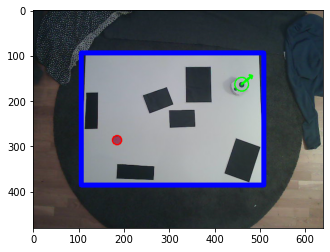

In [3]:
flag=False
vision.initialize()
time.sleep(5) #to get the of the camera done

while(not flag):
    flag=True
    vision.update()
    flag&=vision.Size()
    flag&=globalMap.setRobot(vision.robotDetection())
    flag&=globalMap.setGoal(vision.goalDetection())
    globalMap.setObstacles(vision.obstaclesDetection(True))
    plt.imshow(cv2.cvtColor(vision.imageDraw,cv2.COLOR_BGR2RGB))

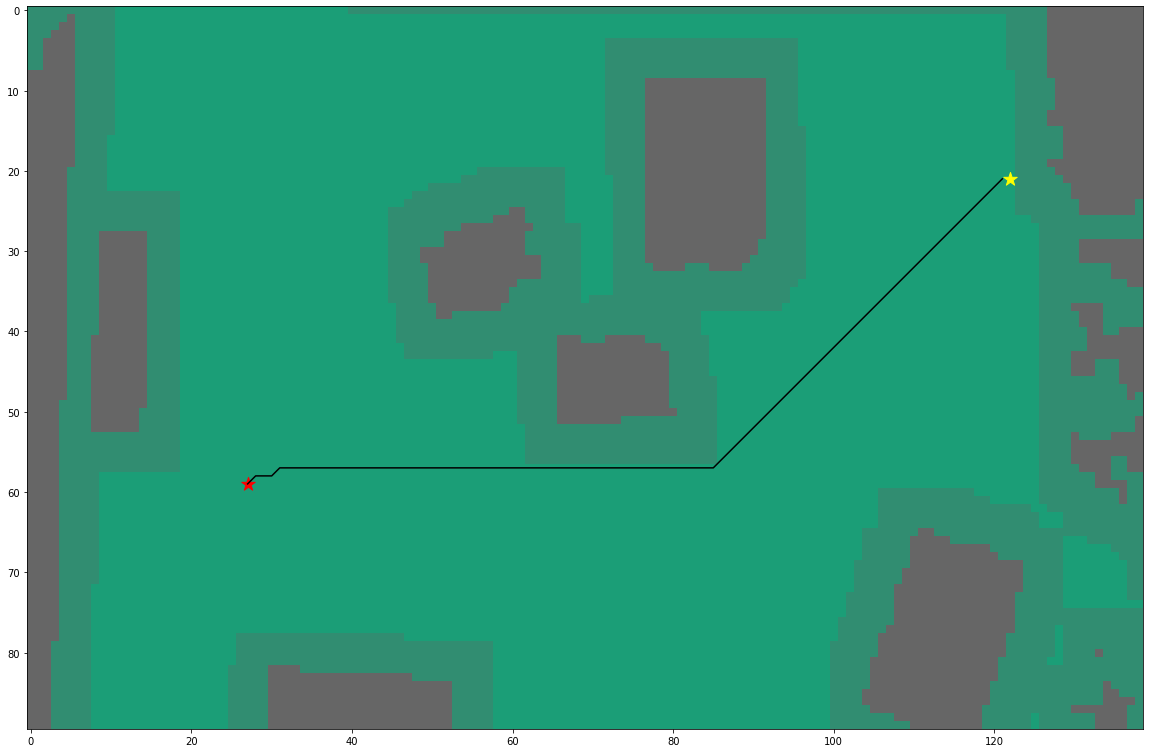

In [9]:
route=ShorthestPath.astar(globalMap.getObstacles(),globalMap.getMapSize()[0], globalMap.getMapSize()[1], 
                          globalMap.getRobot(), globalMap.getGoal())
globalMap.setPath(route)

x_coords = []
y_coords = []
for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

# plot map and path
fig, ax = plt.subplots(figsize=(20,20))
ax = plt.gca()
ax.invert_yaxis()
ax.imshow(vision.obstaclesDetection(False), cmap=plt.cm.Dark2)
ax.imshow(globalMap.getObstacles(), cmap=plt.cm.Dark2, alpha=0.3)
ax.scatter(globalMap.getRobot()[0],globalMap.getRobot()[1], marker = "*", color = "yellow", s = 200)
ax.scatter(globalMap.getGoal()[0],globalMap.getGoal()[1], marker = "*", color = "red", s = 200)
ax.plot(y_coords,x_coords, color = "black")
plt.show()

In [7]:
print(globalMap.getGoal())
print(vision.goalDetection())
print(globalMap.getRobot())
print(vision.robotDetection())

[27, 28]
[27, 28]
[122, 21, 0]
[122, 21, 10]


In [ ]:
while(True):
    vision.update()
    globalMap.setRobot(vision.robotDetection())
    globalMap.setGoal(vision.goalDetection())
    cv2.imshow('Camera', vision.imageDraw)